In [1]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd
import numpy as np
import seaborn as sns
import re
import time
import sys
from datetime import datetime
from datetime import date
from urllib.request import urlopen
import urllib.parse
import json

In [2]:
def parseURL(url):
    result = requests.get(url,headers={"User-Agent":"Mozilla/5.0"})
    soup = bts(result.text, 'html.parser')
    return soup

In [3]:
Total_Link = []

for totalLink in range(1,8):
    Total_Link.append("https://www.itopya.com/notebook_k14?sayfa="+str(totalLink))
    Total_Link.append("https://www.itopya.com/gaming_k85?sayfa="+str(totalLink))
    Total_Link.append("https://www.itopya.com/all-in-one_k86?sayfa="+str(totalLink))
    Total_Link.append("https://www.itopya.com/mini-pc_k162?sayfa="+str(totalLink))

In [4]:
ALL_PRODUCT_URL = []

for products in Total_Link[::]:
    html = parseURL(products)
    
    for link in html.find_all("div",{"class":"product-header"}):
        ALL_PRODUCT_URL.append("https://www.itopya.com"+link.a["href"])

In [5]:
result = []
for details in ALL_PRODUCT_URL[::]:
    html = parseURL(details)
    
    Product_Code = html.find("div",{"class":"product-code"}).text.replace("Ürün Kodu: ","").strip()
    Brand = html.find("div",{"class":"brand"}).text.strip()
    is_amount_exist = "strong" in str(html.find("div",{"class":"amount"}))
    if(is_amount_exist):
        Price = float(html.find("div",{"class":"amount"}).text.replace(".","").replace(",",".").strip())
        data = re.findall("""urunId\s*:\s*'[0-9]*'""", str(html))
        urunId = re.findall("[0-9]+", str(data))
        details_str = parseURL("https://www.itopya.com/Urun/UrunOzellik?id="+urunId[0])
        details_dict = json.loads(str(details_str))
        for item in details_dict:
            if(item["ozellikAdi"] == "İşlemci Serisi"):
                Processor_Series = item["ozellikDeger"]
            if(item["ozellikAdi"] == "İşlemci Hızı"):
                Processor_Speed = float(item["ozellikDeger"].replace("GHz",""))
            if(item["ozellikAdi"] == "Ram Kapasitesi"):
                Ram_Capacity = int(item["ozellikDeger"].replace("GB",""))
            if(item["ozellikAdi"] == "Ram Tipi"):
                Ram_Type = item["ozellikDeger"]
            if(item["ozellikAdi"] == "SSD"):
                SSD = item["ozellikDeger"].replace("GB","").replace("TB","000")
            
        result.append([Product_Code,Brand,Processor_Series,Processor_Speed,Ram_Capacity,Ram_Type,SSD,Price])
columns_name = ["Urun_Kodu","Marka","Islemci_Serisi","Islemci_Hizi(GHz)","Ram_Kapasitesi(GB)","Ram_Tipi","SSD(GB)","Fiyat"]
df = pd.DataFrame.from_records(result,columns = columns_name)

In [6]:
df.head(2400)

,Urun_Kodu,Marka,Islemci_Serisi,Islemci_Hizi(GHz),Ram_Kapasitesi(GB),Ram_Tipi,SSD(GB),Fiyat
0,GF63 THIN 11UC-617XTR,MSI,Intel Core i5,2.7,8,DDR4,512,14999.00
1,SUMMIT E16 A12UCT-065TR,MSI,Intel Core i7,3.6,16,DDR5,1000,39122.40
2,PRESTIGE 14EVO A12M-211TR,MSI,Intel Core i7,3.6,16,DDR4,1000,26326.24
3,CROSSHAIR R6 B12UGZ-414TR,MSI,Intel Core i7,3.5,32,DDR4,1000,47966.81
4,CROSSHAIR B12UGZ-476XTR,MSI,Intel Core i7,3.5,16,DDR4,1000,39498.76
...,...,...,...,...,...,...,...,...
139,AERO 15 OLED XD,GIGABYTE,Intel Core i7,2.3,32,DDR4,1000,52908.70
140,AORUS 15G KC,GIGABYTE,Intel Core i7,2.2,16,DDR4,512,30156.15
141,AERO 15 OLED KC,GIGABYTE,Intel Core i7,2.2,16,DDR4,512,34296.41
142,IdeaPad Gaming 3 15IMH05,LENOVO,Intel Core i5,2.2,8,DDR4,512,16197.12


In [7]:
df.drop(138, axis=0, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 143
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Urun_Kodu           143 non-null    object 
 1   Marka               143 non-null    object 
 2   Islemci_Serisi      143 non-null    object 
 3   Islemci_Hizi(GHz)   143 non-null    float64
 4   Ram_Kapasitesi(GB)  143 non-null    int64  
 5   Ram_Tipi            143 non-null    object 
 6   SSD(GB)             143 non-null    object 
 7   Fiyat               143 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 10.1+ KB


In [9]:
df['SSD(GB)'] = df['SSD(GB)'].astype('float')
df = df.drop(['Urun_Kodu'], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 143
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Marka               143 non-null    object 
 1   Islemci_Serisi      143 non-null    object 
 2   Islemci_Hizi(GHz)   143 non-null    float64
 3   Ram_Kapasitesi(GB)  143 non-null    int64  
 4   Ram_Tipi            143 non-null    object 
 5   SSD(GB)             143 non-null    float64
 6   Fiyat               143 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 8.9+ KB


In [11]:
df.describe()

,Islemci_Hizi(GHz),Ram_Kapasitesi(GB),SSD(GB),Fiyat
count,143.000000,143.000000,143.000000,143.000000
mean,2.798601,17.244755,698.853147,29490.964895
std,0.643930,14.513334,450.642514,19948.792763
min,1.100000,4.000000,128.000000,3807.410000
25%,2.300000,8.000000,512.000000,16331.390000
50%,2.800000,16.000000,512.000000,25008.980000
75%,3.400000,16.000000,1000.000000,36167.990000
max,4.400000,128.000000,2000.000000,118082.290000


In [12]:
Computer = df.select_dtypes(exclude=['object']).copy()

Computer['Marka'] = df['Marka']
Computer['Marka'].nunique()
pd.get_dummies(Computer['Marka'])

Computer['Islemci_Serisi'] = df['Islemci_Serisi']
Computer['Islemci_Serisi'].nunique()
pd.get_dummies(Computer['Islemci_Serisi'])

Computer['Ram_Tipi'] = df['Ram_Tipi']
Computer['Ram_Tipi'].nunique()
pd.get_dummies(Computer['Ram_Tipi'])

Computer = pd.get_dummies(Computer)

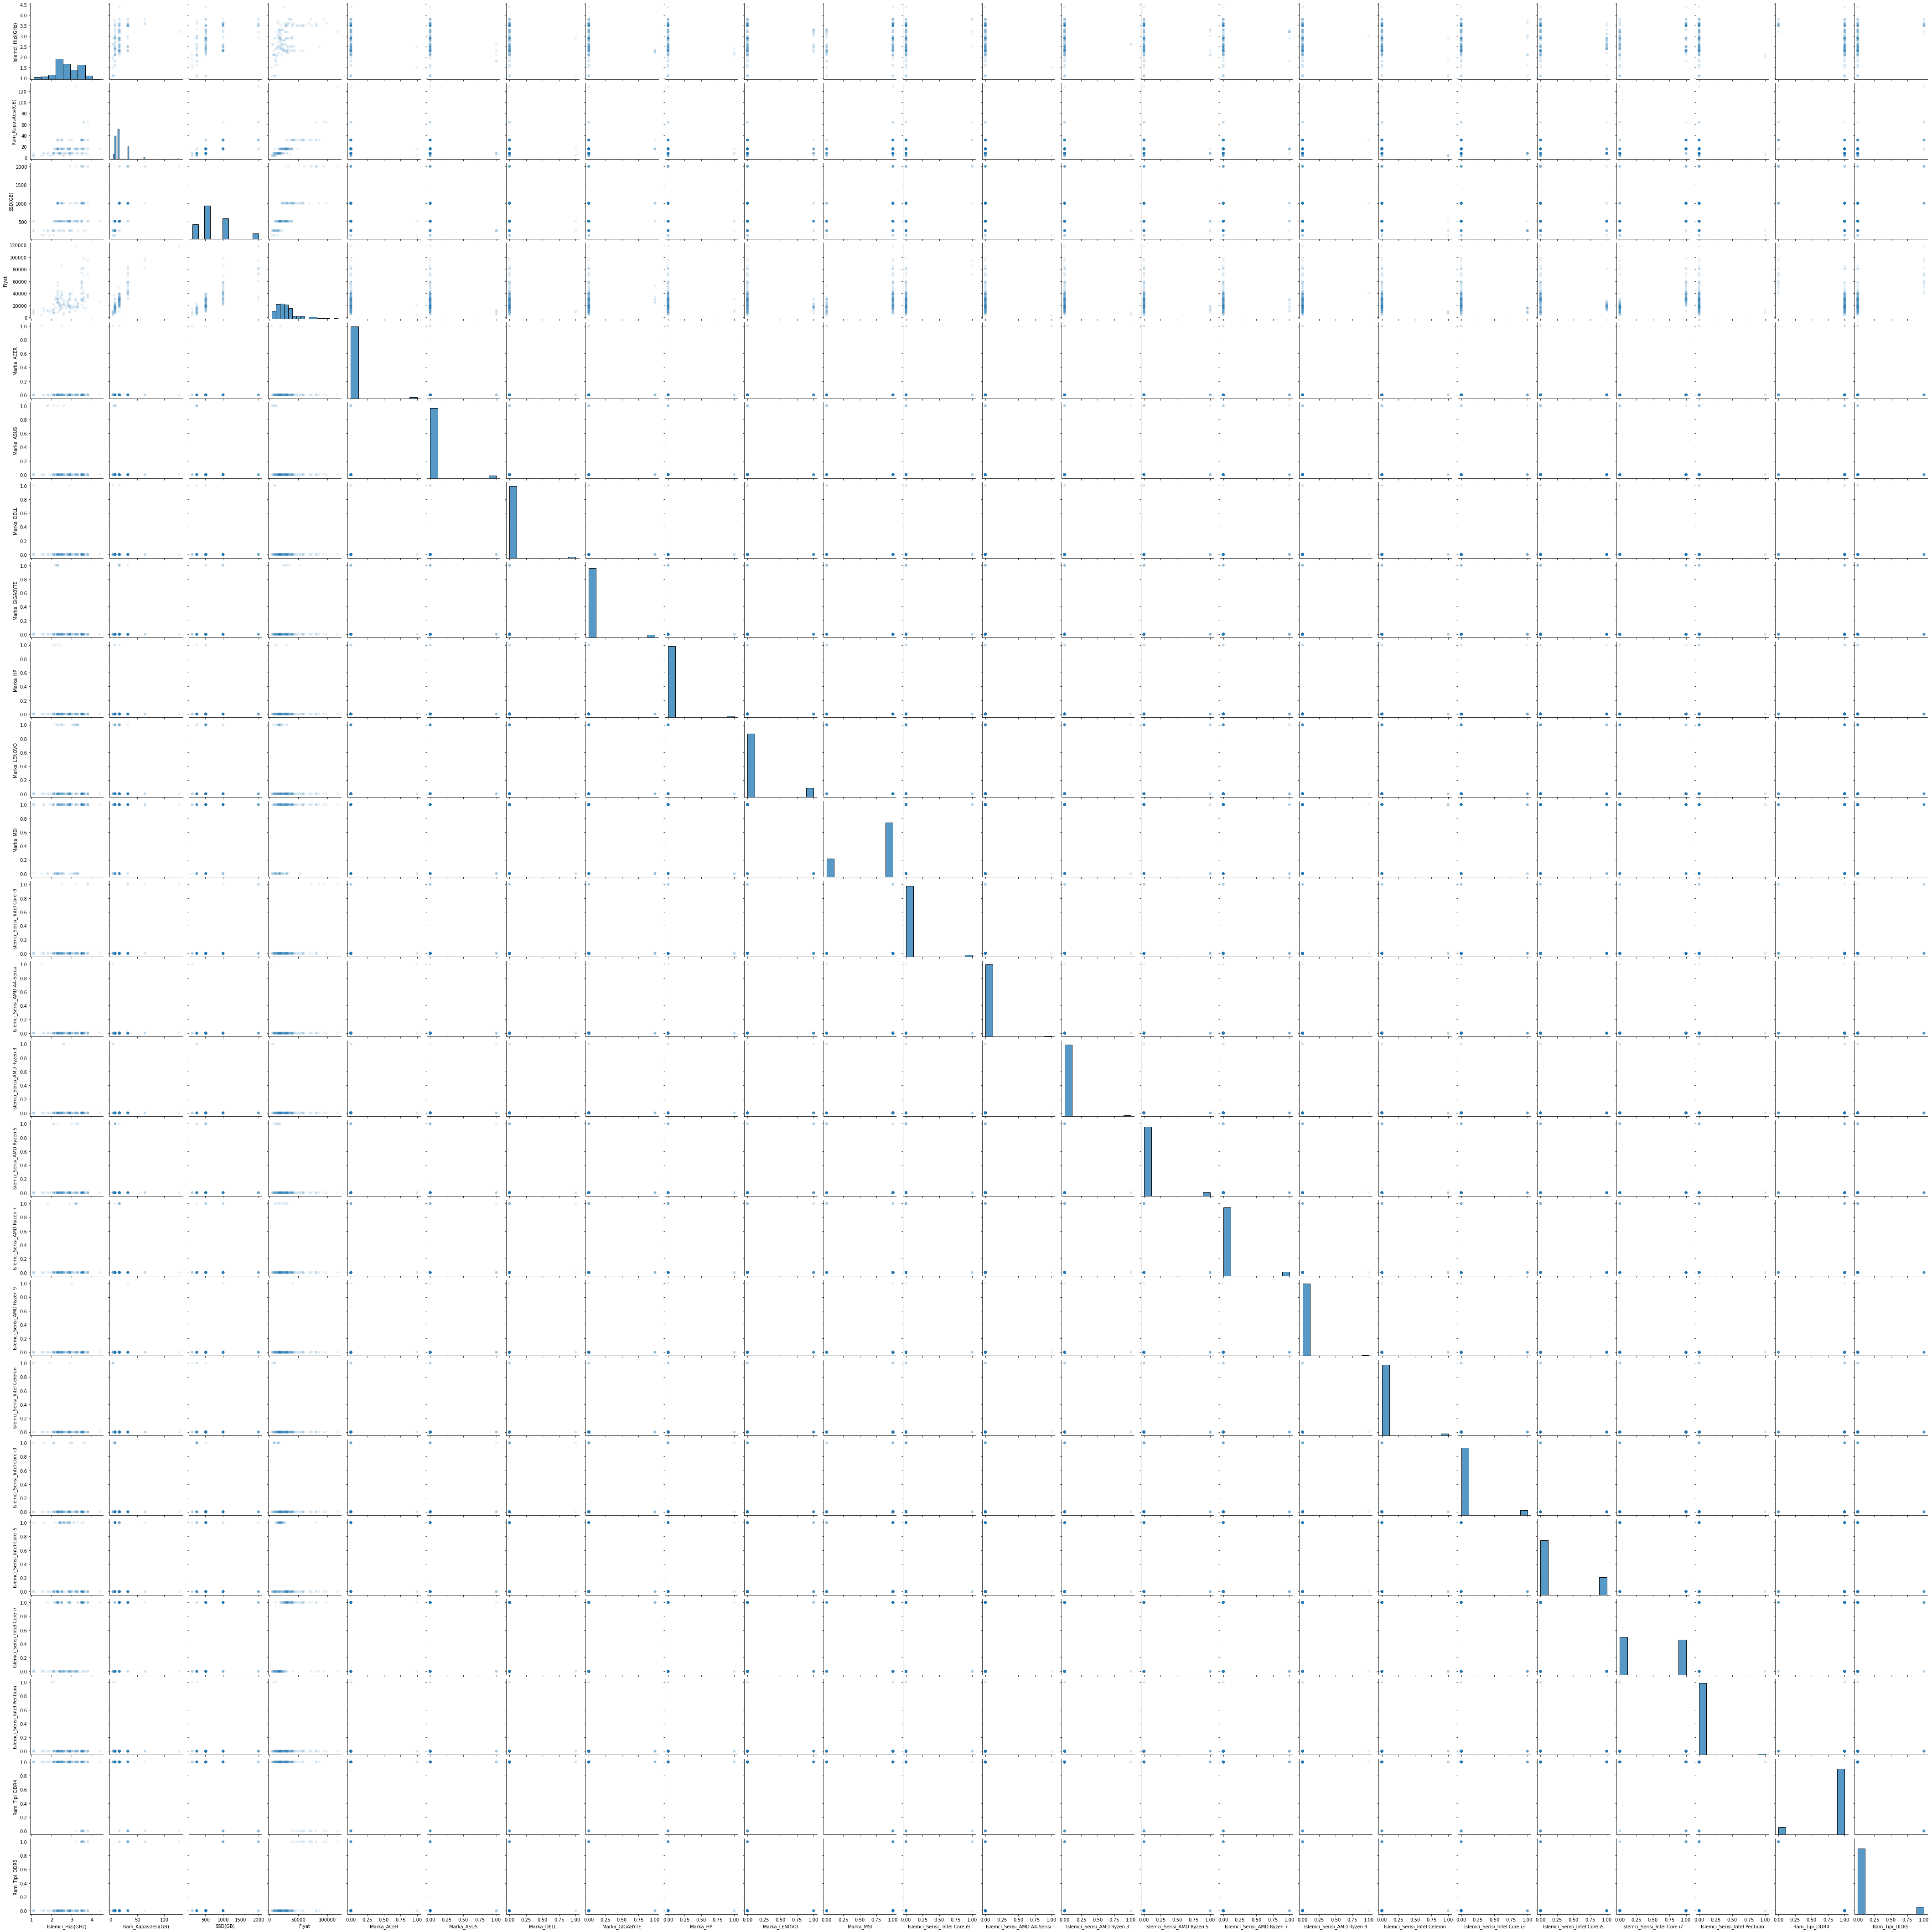

In [13]:
sns.pairplot(Computer, plot_kws=dict(alpha=.1,edgecolor='none'))

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X, y = Computer.drop('Fiyat',axis=1), Computer['Fiyat']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [16]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=1) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [17]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.816
Ridge Regression val R^2: 0.826
Degree 2 polynomial regression val R^2: 0.816


In [18]:
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.814


In [19]:
from sklearn.model_selection import KFold

X, y = Computer.drop('Fiyat',axis=1), Computer['Fiyat']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [20]:
#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Simple regression scores:  [0.8289210691261129, 0.8164373326544605, 0.7396792374795597, 0.8904428970562893, 0.7246277273364436]
Ridge scores:  [0.839595623422152, 0.8166286391831024, 0.7418682127814021, 0.890864652396751, 0.7283170381919908] 

Simple mean cv r^2: 0.800 +- 0.061
Ridge mean cv r^2: 0.803 +- 0.061


In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=1)
lm_reg.fit(X_scaled,y)
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

Ridge Regression test R^2: 0.810


In [22]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

cross_val_score(lm, X, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

array([0.56370204, 0.92569499, 0.85589415, 0.73142155, 0.69309015])

In [23]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cross_val_score(lm, X, y, cv=kf, scoring='r2')

array([0.82892107, 0.81643733, 0.73967924, 0.8904429 , 0.72462773])

In [24]:
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lm_reg, X, y, cv=kf, scoring='r2')))

0.8096652818471715
0.8189410303327429
